# VOIX ORIGINAL

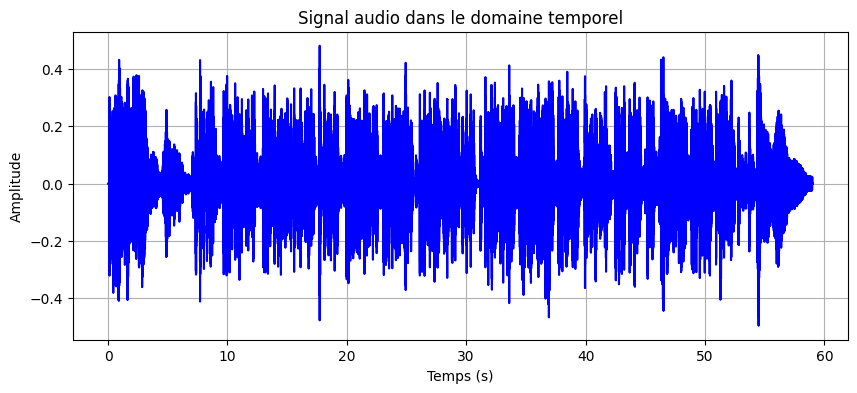

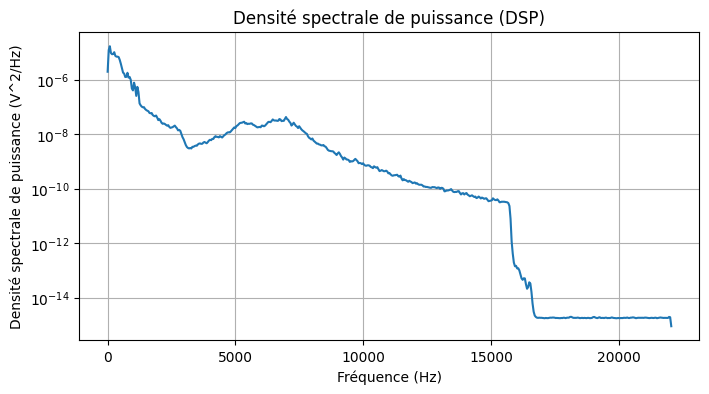

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import soundfile as sf  # Pour lire les fichiers audio

# Charger un fichier audio
signal, fs = sf.read("./data/TSG_F/smile.WAV")  # Remplace "mon_audio.wav" par ton fichier

# Vérifier si le signal est stéréo (2 canaux) et le convertir en mono si nécessaire
if signal.ndim > 1:
    signal = np.mean(signal, axis=1)  # Moyenne des canaux pour un signal mono


duration = len(signal) / fs  # Durée totale du signal en secondes
time = np.linspace(0, duration, len(signal))  # Création de l'axe du temps

# Affichage du signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, color='blue')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal audio dans le domaine temporel")
plt.grid()
plt.show()


# Calcul de la densité spectrale de puissance avec Welch
frequencies, psd = welch(signal, fs, nperseg=1024)

# Affichage du spectre
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, psd)  # Échelle logarithmique pour mieux voir les détails
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité spectrale de puissance (V^2/Hz)")
plt.title("Densité spectrale de puissance (DSP)")
plt.grid()
plt.show()


# BRUIT 12000Hz

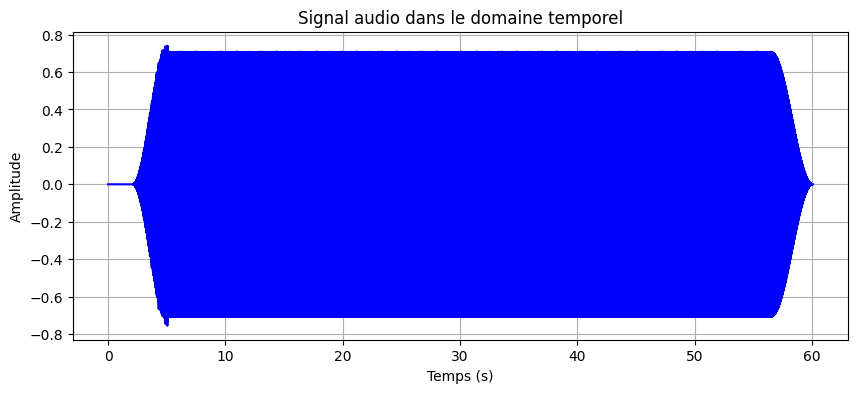

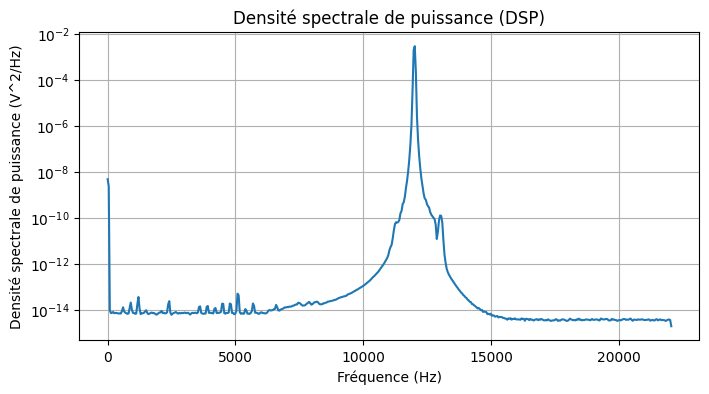

In [2]:
 

# Charger un fichier audio
signal, fs = sf.read("./data/TSG_F/12000Hz.wav")  # Remplace "mon_audio.wav" par ton fichier

# Vérifier si le signal est stéréo (2 canaux) et le convertir en mono si nécessaire
if signal.ndim > 1:
    signal = np.mean(signal, axis=1)  # Moyenne des canaux pour un signal mono


duration = len(signal) / fs  # Durée totale du signal en secondes
time = np.linspace(0, duration, len(signal))  # Création de l'axe du temps

# Affichage du signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, color='blue')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal audio dans le domaine temporel")
plt.grid()
plt.show()


# Calcul de la densité spectrale de puissance avec Welch
frequencies, psd = welch(signal, fs, nperseg=1024)

# Affichage du spectre
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, psd)  # Échelle logarithmique pour mieux voir les détails
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité spectrale de puissance (V^2/Hz)")
plt.title("Densité spectrale de puissance (DSP)")
plt.grid()
plt.show()


# BRUIT + AUDIO 

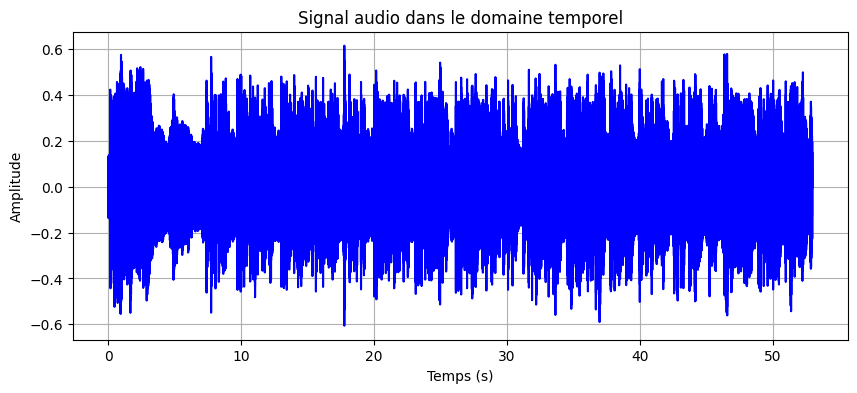

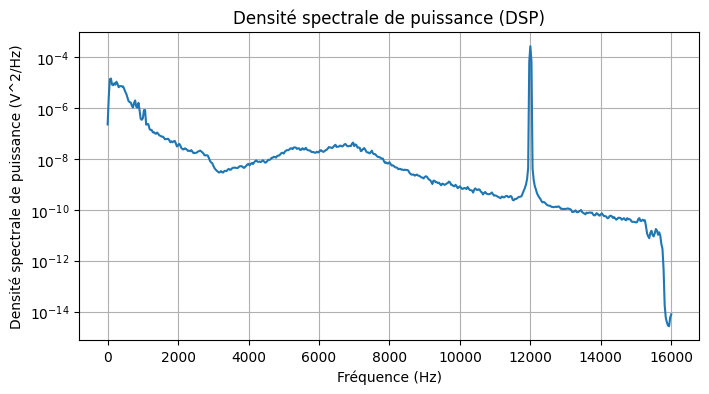

In [3]:
 
# Charger un fichier audio
signal, fs = sf.read("./data/TSG_F/smile_noise.wav")  # Remplace "mon_audio.wav" par ton fichier

# Vérifier si le signal est stéréo (2 canaux) et le convertir en mono si nécessaire
if signal.ndim > 1:
    signal = np.mean(signal, axis=1)  # Moyenne des canaux pour un signal mono


duration = len(signal) / fs  # Durée totale du signal en secondes
time = np.linspace(0, duration, len(signal))  # Création de l'axe du temps

# Affichage du signal
plt.figure(figsize=(10, 4))
plt.plot(time, signal, color='blue')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Signal audio dans le domaine temporel")
plt.grid()
plt.show()



# Calcul de la densité spectrale de puissance avec Welch
frequencies, psd = welch(signal, fs, nperseg=1024)

# Affichage du spectre
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, psd)  # Échelle logarithmique pour mieux voir les détails
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité spectrale de puissance (V^2/Hz)")
plt.title("Densité spectrale de puissance (DSP)")
plt.grid()
plt.show()


# FILTRAGE (FILTRE BUTTERWORTH LOWPASS )

### Les parameters du filtre 


 -L'ordre du filtre  plus l'atténuation des fréquences indésirables est rapide, L'ordre du filtre est le nombre de pôles dans l'équation de transfert du filtre. Il détermine la raideur de la transition entre les fréquences passantes et les fréquences atténuées.


-La fréquence de coupure 
 Dépend du signal utiliser pour notre cas le bruit est occupe aproximativement la bande [8000,16000] ,donc on choisi cuttoff = 8000

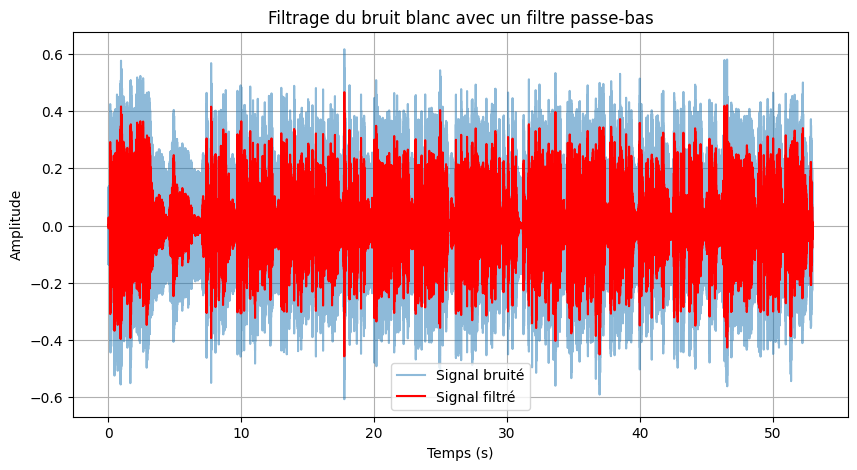

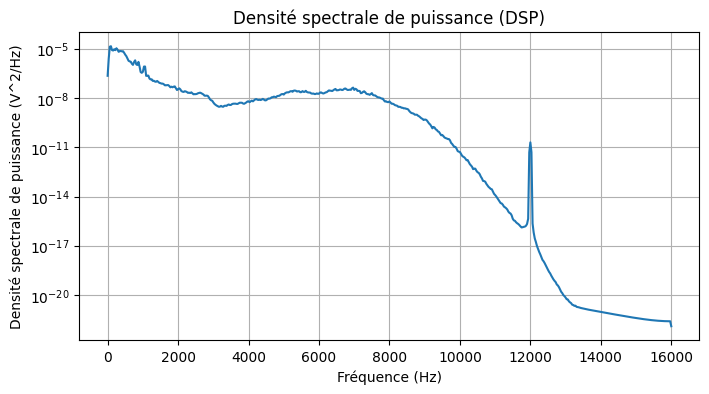

Filtered audio saved to ./data/TSG_F/filtered_audio.WAV


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt

# Charger le fichier audio bruité
signal, fs = sf.read("./data/TSG_F/smile_noise.WAV")  # Signal avec bruit blanc

# Vérifier si le signal est stéréo et le convertir en mono si nécessaire
if signal.ndim > 1:
    signal = np.mean(signal, axis=1)  # Moyenne des canaux pour obtenir un signal mono

# Définition du filtre passe-bas
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  # Normalisation
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  # Coefficients du filtre
    filtered_signal = filtfilt(b, a, data)  # Application du filtre
    return filtered_signal

# Paramètres du filtre
cutoff_freq = 9000  # Fréquence de coupure (Hz), à ajuster selon ton signal.
order = 6  # Ordre du filtre

# Filtrage du signal
filtered_signal = butter_lowpass_filter(signal, cutoff_freq, fs, order)

# Affichage du signal original et filtré
time = np.linspace(0, len(signal) / fs, len(signal))

plt.figure(figsize=(10, 5))
plt.plot(time, signal, label="Signal bruité", alpha=0.5)
plt.plot(time, filtered_signal, label="Signal filtré", color='red')
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.title("Filtrage du bruit blanc avec un filtre passe-bas")
plt.legend()
plt.grid()
plt.show()

# Export the filtered audio to a new file
output_file_path = "./data/TSG_F/filtered_audio.WAV"  # Path to save the filtered audio
sf.write(output_file_path, filtered_signal, fs)  # Save the filtered signal


# Calcul de la densité spectrale de puissance avec Welch
frequencies, psd = welch(filtered_signal, fs, nperseg=1024)

# Affichage du spectre
plt.figure(figsize=(8, 4))
plt.semilogy(frequencies, psd)  # Échelle logarithmique pour mieux voir les détails
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Densité spectrale de puissance (V^2/Hz)")
plt.title("Densité spectrale de puissance (DSP)")
plt.grid()
plt.show()


 
# Export the filtered audio to a new file
output_file_path = "./data/TSG_F/filtered_audio.WAV"  # Path to save the filtered audio
sf.write(output_file_path, filtered_signal, fs)  # Save the filtered signal

 
print(f"Filtered audio saved to {output_file_path}")

# DETERMINER LES PARAMETRE AUTOMATIQUEMENT 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt

# Charger le fichier audio bruité
signal_original, fs1 = sf.read("./data/TSG_F/smile_noise.WAV")  # Signal avec bruit blanc
signal_filtred , fs2 = sf.read("./data/TSG_F/filtered_audio.WAV")  # Signal avec bruit blanc
 
if signal_original.ndim > 1:
    signal_original = np.mean(signal_original, axis=1)  # Convertir en mono

if signal_filtred.ndim > 1:
    signal_filtred = np.mean(signal_filtred, axis=1)  # Convertir en mono

# Vérifier que les fréquences d'échantillonnage sont identiques
if fs1 != fs2:
    print("Attention : Les fréquences d'échantillonnage sont différentes !")


#l'erreur a minimiser en choisissant les parametres du filtre
erreur_absolue = 0.5*(signal_original - signal_filtred)**2
print(f" error is : {np.sum(erreur_absolue)}")


 error is : 10767.92140841973


✅ Filtrage réussi : ordre=1, cutoff=1Hz, erreur=0.01778
✅ Filtrage réussi : ordre=1, cutoff=327Hz, erreur=0.01407
✅ Filtrage réussi : ordre=1, cutoff=654Hz, erreur=0.01321
✅ Filtrage réussi : ordre=1, cutoff=980Hz, erreur=0.01294
✅ Filtrage réussi : ordre=1, cutoff=1307Hz, erreur=0.01281
✅ Filtrage réussi : ordre=1, cutoff=1633Hz, erreur=0.01273
✅ Filtrage réussi : ordre=1, cutoff=1960Hz, erreur=0.01265
✅ Filtrage réussi : ordre=1, cutoff=2286Hz, erreur=0.01257
✅ Filtrage réussi : ordre=1, cutoff=2613Hz, erreur=0.01249
✅ Filtrage réussi : ordre=1, cutoff=2939Hz, erreur=0.01240
✅ Filtrage réussi : ordre=1, cutoff=3266Hz, erreur=0.01230
✅ Filtrage réussi : ordre=1, cutoff=3592Hz, erreur=0.01219
✅ Filtrage réussi : ordre=1, cutoff=3919Hz, erreur=0.01207
✅ Filtrage réussi : ordre=1, cutoff=4245Hz, erreur=0.01194
✅ Filtrage réussi : ordre=1, cutoff=4572Hz, erreur=0.01179
✅ Filtrage réussi : ordre=1, cutoff=4898Hz, erreur=0.01164
✅ Filtrage réussi : ordre=1, cutoff=5225Hz, erreur=0.01146
✅ F

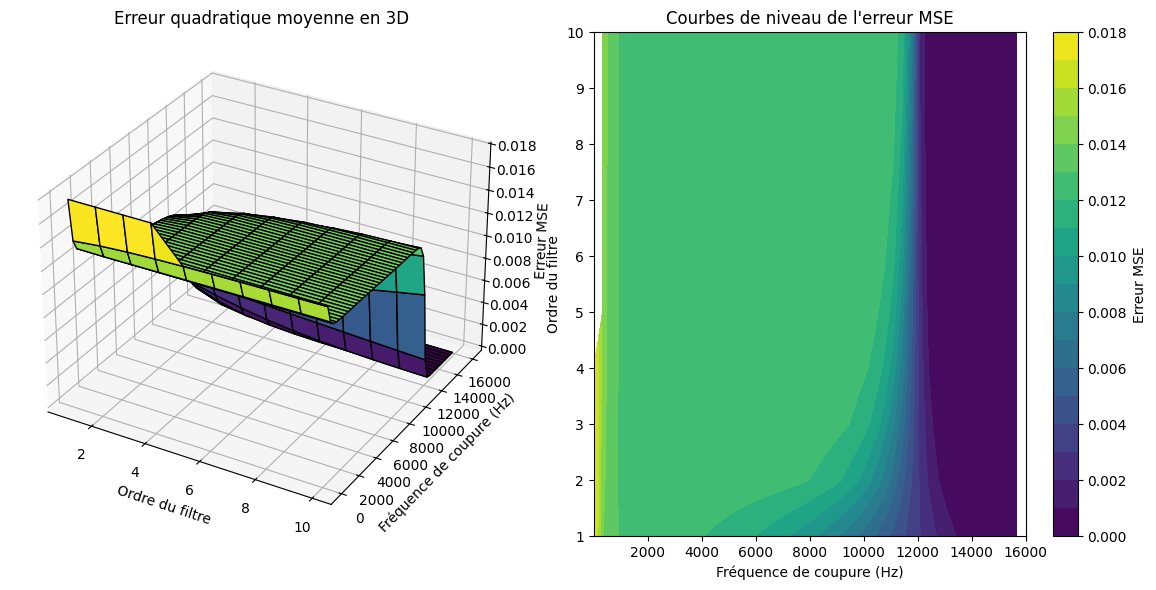

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D

# Charger le fichier audio bruité
signal, fs = sf.read("./data/TSG_F/smile_noise.WAV")  

# Vérifier si le signal est stéréo et le convertir en mono si nécessaire
if signal.ndim > 1:
    signal = np.mean(signal, axis=1)  

# Définition du filtre passe-bas
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  # Normalisation
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Plages de valeurs
orders = np.arange(1, 11)  # Ordre de 1 à 10
cutoff_values = np.linspace(1, 16000, 50)  # 50 valeurs entre 1 Hz et 16 kHz
 

# Matrice pour stocker l'erreur
error_matrix = np.zeros((len(orders), len(cutoff_values)))

# Boucle sur chaque combinaison de paramètres
for i, order in enumerate(orders):
    for j, cutoff_freq in enumerate(cutoff_values):
        # Vérifier que cutoff < Nyquist
        if cutoff_freq >= fs / 2:
            error_matrix[i, j] = np.nan  # Valeur non valide
            continue  

        try:
            # Filtrer le signal
            filtered_signal = butter_lowpass_filter(signal, cutoff_freq, fs, order)
            
            # Calculer l'erreur quadratique moyenne (MSE)
            mse = np.mean((signal - filtered_signal) ** 2)  
            error_matrix[i, j] = mse

            print(f"✅ Filtrage réussi : ordre={order}, cutoff={int(cutoff_freq)}Hz, erreur={mse:.5f}")

        except Exception as e:
            print(f"⚠️ Erreur pour ordre={order}, cutoff={int(cutoff_freq)}Hz : {e}")
            error_matrix[i, j] = np.nan  # Valeur non valide en cas d'erreur

# Création des grilles pour la représentation 3D
O, C = np.meshgrid(orders, cutoff_values, indexing='ij')

# Figure 3D de l'erreur
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(O, C, error_matrix, cmap='viridis', edgecolor='k')
ax.set_xlabel("Ordre du filtre")
ax.set_ylabel("Fréquence de coupure (Hz)")
ax.set_zlabel("Erreur MSE")
ax.set_title("Erreur quadratique moyenne en 3D")

# Graphe des courbes de niveau (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(C, O, error_matrix, cmap='viridis', levels=20)
plt.colorbar(contour, ax=ax2, label="Erreur MSE")
ax2.set_xlabel("Fréquence de coupure (Hz)")
ax2.set_ylabel("Ordre du filtre")
ax2.set_title("Courbes de niveau de l'erreur MSE")

plt.tight_layout()
plt.show()


# TEST SIGNAL AVEC BRUIT 1.3 Khz

✅ Filtrage réussi : ordre=1, cutoff=1Hz, erreur=0.00980
✅ Filtrage réussi : ordre=1, cutoff=327Hz, erreur=0.00607
✅ Filtrage réussi : ordre=1, cutoff=654Hz, erreur=0.00520
✅ Filtrage réussi : ordre=1, cutoff=980Hz, erreur=0.00494
✅ Filtrage réussi : ordre=1, cutoff=1307Hz, erreur=0.00482
✅ Filtrage réussi : ordre=1, cutoff=1633Hz, erreur=0.00474
✅ Filtrage réussi : ordre=1, cutoff=1960Hz, erreur=0.00468
✅ Filtrage réussi : ordre=1, cutoff=2286Hz, erreur=0.00462
✅ Filtrage réussi : ordre=1, cutoff=2613Hz, erreur=0.00456
✅ Filtrage réussi : ordre=1, cutoff=2939Hz, erreur=0.00450
✅ Filtrage réussi : ordre=1, cutoff=3266Hz, erreur=0.00443
✅ Filtrage réussi : ordre=1, cutoff=3592Hz, erreur=0.00436
✅ Filtrage réussi : ordre=1, cutoff=3919Hz, erreur=0.00428
✅ Filtrage réussi : ordre=1, cutoff=4245Hz, erreur=0.00420
✅ Filtrage réussi : ordre=1, cutoff=4572Hz, erreur=0.00411
✅ Filtrage réussi : ordre=1, cutoff=4898Hz, erreur=0.00402
✅ Filtrage réussi : ordre=1, cutoff=5225Hz, erreur=0.00393
✅ F

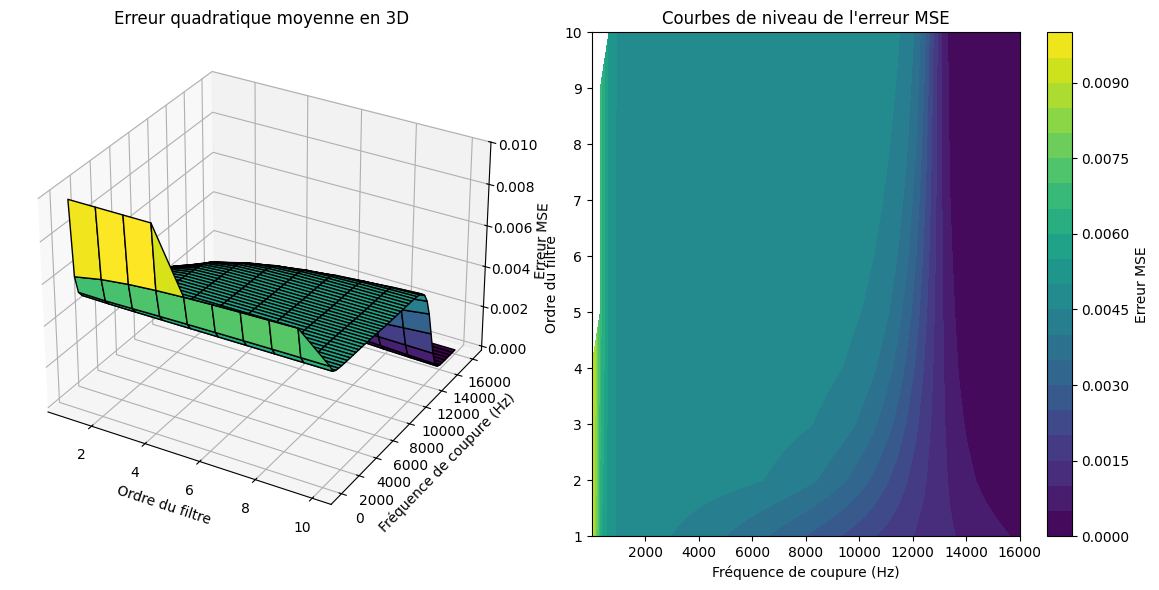

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D

# Charger le fichier audio bruité
signal, fs = sf.read("./data/TSG_F/smile_noise13.WAV")  

# Vérifier si le signal est stéréo et le convertir en mono si nécessaire
if signal.ndim > 1:
    signal = np.mean(signal, axis=1)  

# Définition du filtre passe-bas
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  # Normalisation
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Plages de valeurs
orders = np.arange(1, 11)  # Ordre de 1 à 10
cutoff_values = np.linspace(1, 16000, 50)  # 50 valeurs entre 1 Hz et 16 kHz
 

# Matrice pour stocker l'erreur
error_matrix = np.zeros((len(orders), len(cutoff_values)))

# Boucle sur chaque combinaison de paramètres
for i, order in enumerate(orders):
    for j, cutoff_freq in enumerate(cutoff_values):
        # Vérifier que cutoff < Nyquist
        if cutoff_freq >= fs / 2:
            error_matrix[i, j] = np.nan  # Valeur non valide
            continue  

        try:
            # Filtrer le signal
            filtered_signal = butter_lowpass_filter(signal, cutoff_freq, fs, order)
            
            # Calculer l'erreur quadratique moyenne (MSE)
            mse = np.mean((signal - filtered_signal) ** 2)  
            error_matrix[i, j] = mse

            print(f"✅ Filtrage réussi : ordre={order}, cutoff={int(cutoff_freq)}Hz, erreur={mse:.5f}")

        except Exception as e:
            print(f"⚠️ Erreur pour ordre={order}, cutoff={int(cutoff_freq)}Hz : {e}")
            error_matrix[i, j] = np.nan  # Valeur non valide en cas d'erreur

# Création des grilles pour la représentation 3D
O, C = np.meshgrid(orders, cutoff_values, indexing='ij')

# Figure 3D de l'erreur
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(O, C, error_matrix, cmap='viridis', edgecolor='k')
ax.set_xlabel("Ordre du filtre")
ax.set_ylabel("Fréquence de coupure (Hz)")
ax.set_zlabel("Erreur MSE")
ax.set_title("Erreur quadratique moyenne en 3D")

# Graphe des courbes de niveau (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(C, O, error_matrix, cmap='viridis', levels=20)
plt.colorbar(contour, ax=ax2, label="Erreur MSE")
ax2.set_xlabel("Fréquence de coupure (Hz)")
ax2.set_ylabel("Ordre du filtre")
ax2.set_title("Courbes de niveau de l'erreur MSE")

plt.tight_layout()
plt.show()


# detection du coude 

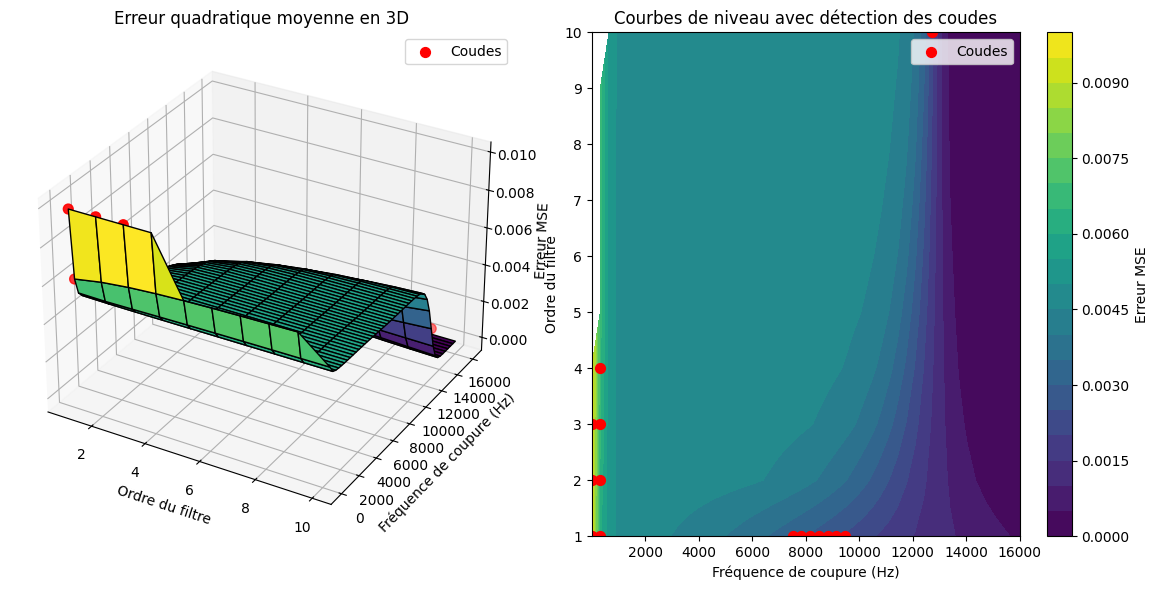

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, filtfilt
from mpl_toolkits.mplot3d import Axes3D

# Charger le fichier audio bruité
signal, fs = sf.read("./data/TSG_F/smile_noise13.WAV")  

# Vérifier si le signal est stéréo et le convertir en mono si nécessaire
if signal.ndim > 1:
    signal = np.mean(signal, axis=1)  

# Définition du filtre passe-bas
def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Fréquence de Nyquist
    normal_cutoff = cutoff / nyquist  # Normalisation
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Plages de valeurs
orders = np.arange(1, 11)  # Ordre de 1 à 10
cutoff_values = np.linspace(1, 16000, 50)  # 50 valeurs entre 1 Hz et 16 kHz

# Matrice pour stocker l'erreur
error_matrix = np.zeros((len(orders), len(cutoff_values)))

# Boucle sur chaque combinaison de paramètres
for i, order in enumerate(orders):
    for j, cutoff_freq in enumerate(cutoff_values):
        # Vérifier que cutoff < Nyquist
        if cutoff_freq >= fs / 2:
            error_matrix[i, j] = np.nan  # Valeur non valide
            continue  

        try:
            # Filtrer le signal
            filtered_signal = butter_lowpass_filter(signal, cutoff_freq, fs, order)
            
            # Calculer l'erreur quadratique moyenne (MSE)
            mse = np.mean((signal - filtered_signal) ** 2)  
            error_matrix[i, j] = mse

        except Exception:
            error_matrix[i, j] = np.nan  # Valeur non valide en cas d'erreur

# Création des grilles pour la représentation 3D
O, C = np.meshgrid(orders, cutoff_values, indexing='ij')

# Calcul des gradients de l'erreur
grad_o, grad_c = np.gradient(error_matrix)  # Dérivées partielles par rapport à o et fs
grad_magnitude = np.sqrt(grad_o**2 + grad_c**2)  # Norme du gradient

# Détection des coudes : recherche des max locaux de la dérivée
threshold = np.nanpercentile(grad_magnitude, 97) 
elbow_points = np.where(grad_magnitude > threshold)

# Figure 3D de l'erreur avec les coudes
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(O, C, error_matrix, cmap='viridis', edgecolor='k')
ax.scatter(O[elbow_points], C[elbow_points], error_matrix[elbow_points], color='r', marker='o', s=50, label="Coudes")
ax.set_xlabel("Ordre du filtre")
ax.set_ylabel("Fréquence de coupure (Hz)")
ax.set_zlabel("Erreur MSE")
ax.set_title("Erreur quadratique moyenne en 3D")
ax.legend()

# Graphe des courbes de niveau (contour plot)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(C, O, error_matrix, cmap='viridis', levels=20)
plt.colorbar(contour, ax=ax2, label="Erreur MSE")
ax2.scatter(C[elbow_points], O[elbow_points], color='r', marker='o', s=50, label="Coudes")
ax2.set_xlabel("Fréquence de coupure (Hz)")
ax2.set_ylabel("Ordre du filtre")
ax2.set_title("Courbes de niveau avec détection des coudes")
ax2.legend()

plt.tight_layout()
plt.show()
